# Notes:


- Wording on the json challenge - make sure you say something about the json being particularly gnarly (otherwise it might look like you just didn’t know what to do about any json, which we know isn’t true, this one was just out of control)
- Make way more of your slide dedicated to the graph (should be like…almost the whole slide)
- Concerts per month - you really dont need any of those bullets. If you want some of that stuff about the overall data set, put it in your intro; 

- also, can you add in the missing months and tilt everything to like 45 degrees or something so everything fits? Or use abbreviations
- Make sure you are staying on each slide long enough for us to consume the information - slow down your speech as well

- Those slides with big ol pies - maybe a different representation? Especially for that last one

- Be mindful of “Uhms” and “You knows” while you are presenting

- Setlist.fm intro – probably too much, and the bullet point spacing and indentation is a bit nuts
- Any chance every month could be listed on the axis?
- Portland wasn’t on the map, you’re also missing several on Europe including ones that should be there, not just Buenos Aires and Canada
- explain what "Traditional" is
- Originals vs covers cluster bars need commas: 20,000 40,000 etc
- Slow down speaking a bit, I can hear you running out of breath and you’re FLYING through some of these charts
- You don’t need to admit that you had trouble with cover bands, you could say it was a challenge or something but frame it in a way that makes it sound like an accomplishment, not a struggle

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from matplotlib.pyplot import figure

# cd documents/nss/projects/Python_Projects/music_matters/Notebooks

## Made a dataframe to show how many requests I would need per city so I wouldn't run out of requests in the middle of getting data from one city. 

In [2]:
data={'Cities':['New York', 'Nashville', 'Austin', 'Los Angeles', 'Chicago', 
           'Las Vegas', 'Denver', 'San Fransicso', 'Seattle', 'Portland'], 
 'States': ['NY', 'TN', 'TX', 'CA', 'IL', 'NV', 'CO', 'CA', 'WA', 'OR'], 
      'Number of Setlists':[8155, 2225, 4369, 8021, 5683, 4327, 3063, 2565, 3186, 2362]}


df=pd.DataFrame(data)

df['Number of Requests']=df['Number of Setlists']/20
df

,Cities,States,Number of Setlists,Number of Requests
0,New York,NY,8155,407.75
1,Nashville,TN,2225,111.25
2,Austin,TX,4369,218.45
3,Los Angeles,CA,8021,401.05
4,Chicago,IL,5683,284.15
5,Las Vegas,NV,4327,216.35
6,Denver,CO,3063,153.15
7,San Fransicso,CA,2565,128.25
8,Seattle,WA,3186,159.30
9,Portland,OR,2362,118.10


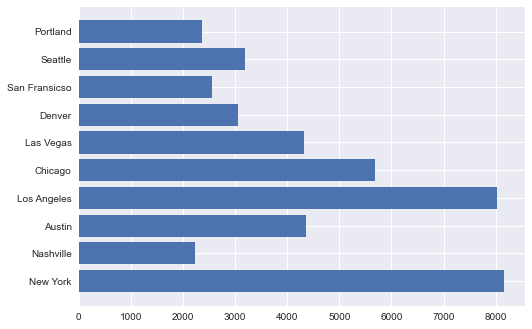

In [3]:
# US cities
plt.barh(df['Cities'],df['Number of Setlists'])
plt.show()

In [4]:
non_us_cities = {'Cities': ['London', 'Paris', 'Toronto', 'Buenos Aires', 'Manchester', 'Brussels', 'Berlin', 'Barcelona', 'Amsterdam', 'Antwerp','Glasgow'], 
        'Country_Code': ['GB', 'FR', 'CA', 'AR', 'GB', 'BE', 'DE','ES', 'NL', 'BE', 'GB'], 
        'Number of Setlists':[8409,3791,3788,3480,3059,2634,2504,2417,2235,2215,2018]      
       }

non_us_cities_df=pd.DataFrame(non_us_cities)

non_us_cities_df['Number of Requests']=non_us_cities_df['Number of Setlists']/20
non_us_cities_df

,Cities,Country_Code,Number of Setlists,Number of Requests
0,London,GB,8409,420.45
1,Paris,FR,3791,189.55
2,Toronto,CA,3788,189.40
3,Buenos Aires,AR,3480,174.00
4,Manchester,GB,3059,152.95
5,Brussels,BE,2634,131.70
6,Berlin,DE,2504,125.20
7,Barcelona,ES,2417,120.85
8,Amsterdam,NL,2235,111.75
9,Antwerp,BE,2215,110.75


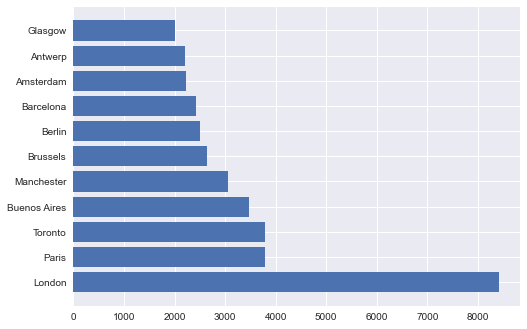

In [5]:
plt.barh(non_us_cities_df['Cities'],non_us_cities_df['Number of Setlists'])
plt.show()

## Imported dataframes from each city saved in excel so I wouldn't have to make API requests each time I ran the kernel. And because my request limit of 1440/day wouldn't allow for all the data to be obtained in one day.

In [6]:
portland=pd.read_excel('../Data/music_matters_portland.xlsx')
portland['city'].value_counts()

Portland        11641
Troutdale         665
Happy Valley      296
Forest Grove      131
Beaverton          37
West Linn          16
Name: city, dtype: int64

Realized that by Portland, they also included concerts from the surrounding area. Decided to only focus on concerts in the proper city area. 

In [7]:
portland = portland[portland['city']=='Portland']
portland['city'].value_counts()

Portland    11641
Name: city, dtype: int64

In [8]:
seattle=pd.read_excel('../Data/music_matters_seattle.xlsx')
seattle = seattle[seattle['city']=='Seattle']

In [9]:
nashville=pd.read_excel('../Data/music_matters_nashville.xlsx')
nashville = nashville[nashville['city']=='Nashville']

In [10]:
new_york=pd.read_excel('../Data/music_matters_new_york.xlsx')
new_york = new_york[new_york['city']=='New York']

In [11]:
los_angeles =pd.read_excel('../Data/music_matters_los_angeles.xlsx')
los_angeles = los_angeles[los_angeles['city']=='Los Angeles']

In [12]:
austin =pd.read_excel('../Data/music_matters_austin.xlsx')
austin = austin[austin['city']=='Austin']

In [13]:
chicago =pd.read_excel('../Data/music_matters_chicago.xlsx')
chicago = chicago[chicago['city']=='Chicago']

In [14]:
denver =pd.read_excel('../Data/music_matters_denver.xlsx')
denver = denver[denver['city']=='Denver']

In [15]:
las_vegas =pd.read_excel('../Data/music_matters_las_vegas.xlsx')
las_vegas = las_vegas[las_vegas['city']=='Las Vegas']

In [16]:
san_francisco =pd.read_excel('../Data/music_matters_san_francisco.xlsx')
san_francisco = san_francisco[san_francisco['city']=='San Francisco']

## Non US Cities

In [17]:
paris =pd.read_excel('../Data/music_matters_paris.xlsx')
paris = paris[paris['city']=='Paris']

In [18]:
toronto =pd.read_excel('../Data/music_matters_toronto.xlsx')
toronto = toronto[toronto['city']=='Toronto']

In [19]:
manchester =pd.read_excel('../Data/music_matters_manchester.xlsx')
manchester = manchester[manchester['city']=='Manchester']

In [20]:
london =pd.read_excel('../Data/music_matters_london.xlsx')
london = london[london['city']=='London']

In [21]:
buenos_aires =pd.read_excel('../Data/music_matters_buenos_aires.xlsx')
buenos_aires = buenos_aires[buenos_aires['city']=='Buenos Aires']

In [22]:
berlin =pd.read_excel('../Data/music_matters_berlin.xlsx')
berlin = berlin[berlin['city']=='Berlin']

In [23]:
brussels =pd.read_excel('../Data/music_matters_brussels.xlsx')
brussels = brussels[brussels['city']=='Brussels']

In [24]:
barcelona =pd.read_excel('../Data/music_matters_barcelona.xlsx')
barcelona= barcelona[barcelona['city']=='Barcelona']

In [25]:
amsterdam =pd.read_excel('../Data/music_matters_amsterdam.xlsx')
amsterdam = amsterdam[amsterdam['city']=='Amsterdam']

In [26]:
antwerp =pd.read_excel('../Data/music_matters_antwerp.xlsx')
antwerp = antwerp[antwerp['city']=='Antwerp']

## Concatenated all city dataframes together into one big dataframe

In [27]:
concat = pd.concat([new_york, nashville, seattle, portland, los_angeles, chicago, austin, denver, las_vegas, san_francisco, paris, toronto, manchester, london, brussels, berlin, barcelona, buenos_aires, amsterdam, antwerp], ignore_index=True)

## Removed the band ABBA Voyage (virtual performances by 'Abbatars')

In [28]:
concat = concat[concat['artist']!='ABBA Voyage']

## Made a new column that showed whether song was an original or a cover

In [29]:
concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')

In [30]:
concat['cover'].value_counts().head(10)

original         286523
The Beatles         813
Pink Floyd          646
Grateful Dead       464
David Bowie         359
[traditional]       349
Queen               325
Talking Heads       256
Bob Dylan           250
Led Zeppelin        249
Name: cover, dtype: int64

## Fixing 'traditional' title

In [31]:
# pumpkins['type'] = pumpkins['type'].replace(['F'], 'Field Pumpkin')

concat['cover']=concat['cover'].replace(['[traditional]'], 'Traditional')

In [32]:
concat['cover'].value_counts().head(10)

original         286523
The Beatles         813
Pink Floyd          646
Grateful Dead       464
David Bowie         359
Traditional         349
Queen               325
Talking Heads       256
Bob Dylan           250
Led Zeppelin        249
Name: cover, dtype: int64

## Subsetted dataframe to look at only covers

In [33]:
covers = concat[concat['original_vs_cover']=='Cover']

## Further subsetted to look at US cities vs non-US cities. Then subsetted 

In [34]:
us=concat[concat['country']=='United States']

In [35]:
non_us = concat[concat['country']!='United States']

In [36]:
us_covers = us[us['original_vs_cover']=='Cover']

In [37]:
non_us_covers = non_us[non_us['original_vs_cover']=='Cover']

In [38]:
us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True)

Cover Me Up                              23
Dreams                                   25
Mr. Brightside                           27
What Makes You Beautiful                 28
Time                                     30
Another Brick in the Wall, Part 2        31
This Must Be the Place (Naive Melody)    32
Once in a Lifetime                       37
Creep                                    38
Happy Birthday to You                    48
Name: song, dtype: int64

([<matplotlib.axis.XTick at 0x19002fcb340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

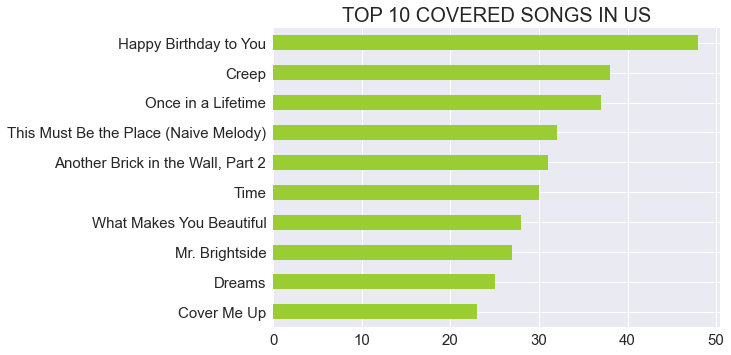

In [39]:
us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='',color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS IN US',fontsize=20)

tick_val = [0,10,20,30,40,50]
plt.xticks(tick_val)


([<matplotlib.axis.XTick at 0x19003839280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

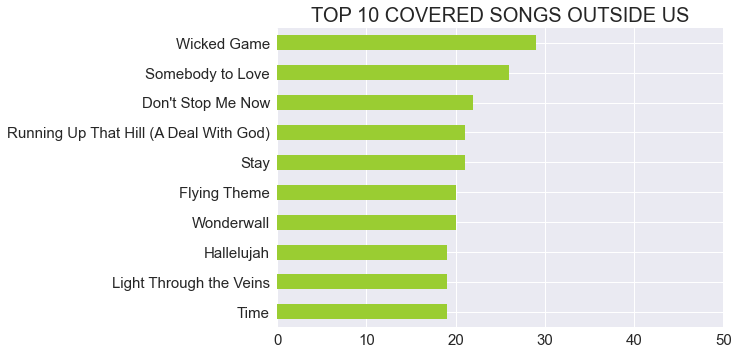

In [40]:
non_us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS OUTSIDE US',fontsize=20)

tick_val = [0,10,20,30,40,50]
plt.xticks(tick_val)



([<matplotlib.axis.XTick at 0x1907f51b1f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

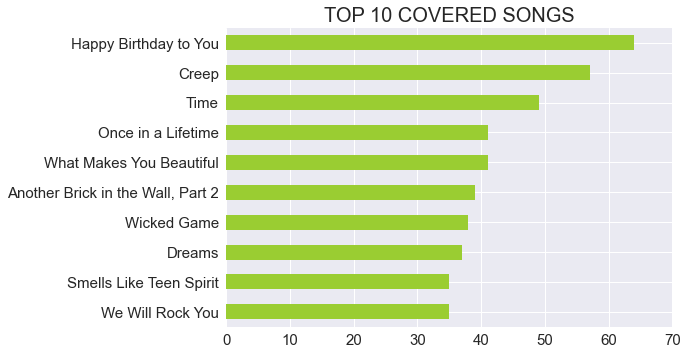

In [41]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='',color='yellowgreen',legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED SONGS',fontsize=20)

tick_val = [0,10,20,30,40,50,60,70]
plt.xticks(tick_val)

([<matplotlib.axis.XTick at 0x19003277fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

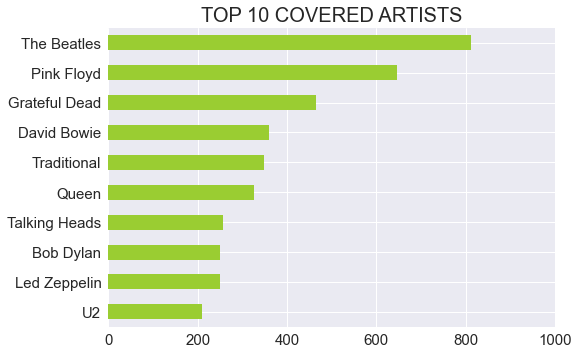

In [42]:
covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', color='yellowgreen',fontsize=15)
plt.title('TOP 10 COVERED ARTISTS',fontsize=20)

tick_val = [0,200,400,600,800,1000]
plt.xticks(tick_val)

([<matplotlib.axis.XTick at 0x190039ba610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

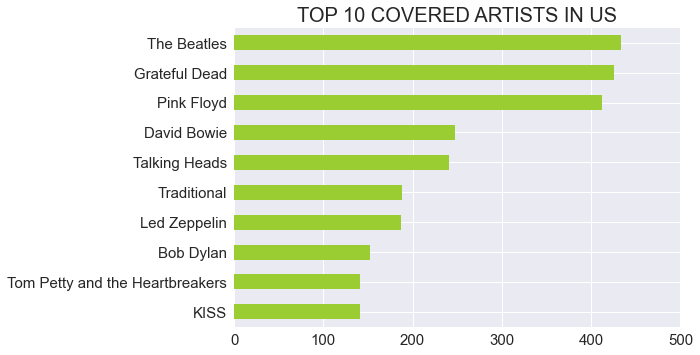

In [43]:
us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen', legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED ARTISTS IN US',fontsize=20)

tick_val = [0,100,200,300,400,500]
plt.xticks(tick_val)

([<matplotlib.axis.XTick at 0x1900f181730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

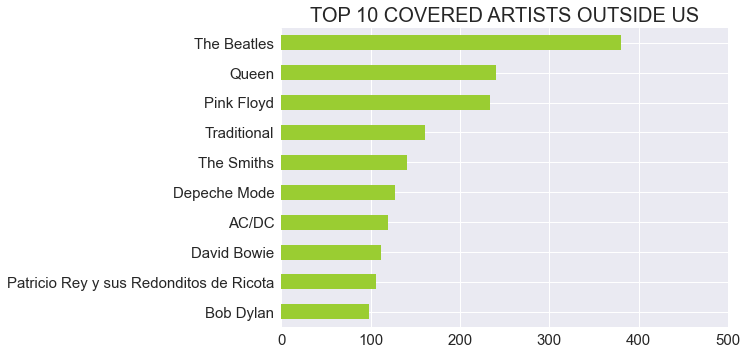

In [125]:


non_us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', color='yellowgreen',legend=False, ylabel='', fontsize=15)
plt.title('TOP 10 COVERED ARTISTS OUTSIDE US',fontsize=20)

#plt.tight_layout()
tick_val = [0,100,200,300,400,500]
plt.xticks(tick_val)


<AxesSubplot:>

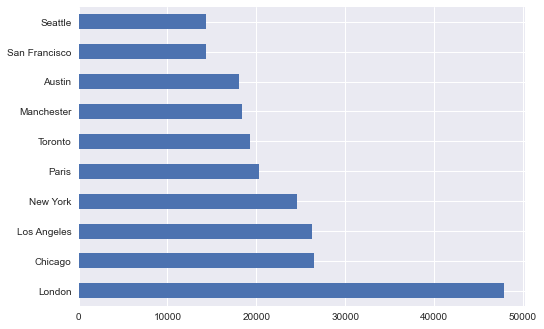

In [45]:
concat['city'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='barh')

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

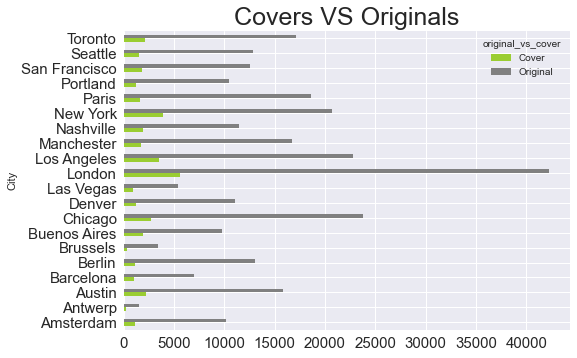

In [122]:
concat.groupby(['city', 'original_vs_cover']).size().unstack('original_vs_cover').plot(kind='barh', color=('yellowgreen', 'grey'),xlabel='City', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)
# plt.tight_layout()
#plt.bar(color='cyan')
# plt.bar(x, B, bottom=A, color='green', label='B')


In [47]:
# pltcolors.get_named_colors_mapping()



In [48]:
top_10_cities = concat.groupby('city').count()
top_10_cities

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
city,,,,,,,,,,,,,,,,
Amsterdam,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11250,11305,11305
Antwerp,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1634,1649,1649
Austin,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,17822,18029,18029
Barcelona,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7926,7958,7958
Berlin,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14076,14191,14191
Brussels,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3732,3739,3739
Buenos Aires,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11564,11660,11660
Chicago,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26348,26527,26527
Denver,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12141,12219,12219


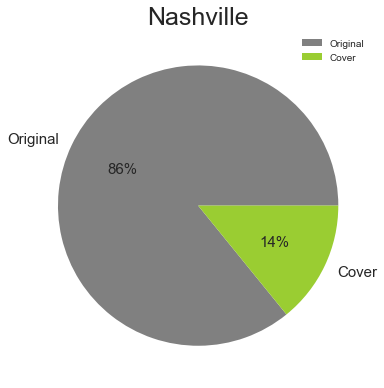

In [49]:
nashville = concat[concat['city']=='Nashville']

nashville['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Nashville',fontsize=25)
plt.tight_layout()

In [50]:
nashville['artist'].value_counts()

Jason Isbell and the 400 Unit    134
Derek Webb                       101
Carrie Underwood                  85
David Cook                        82
Lilly Hiatt                       66
                                ... 
Shawn Colvin                       1
Benny Mikula/The Lone Gnome        1
Gaither Vocal Band                 1
Jason Wilkes                       1
Charles Esten                      1
Name: artist, Length: 979, dtype: int64

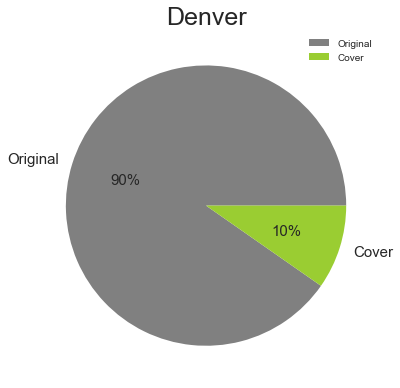

In [51]:
denver = concat[concat['city']=='Denver']

denver['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Denver',fontsize=25)
plt.tight_layout()

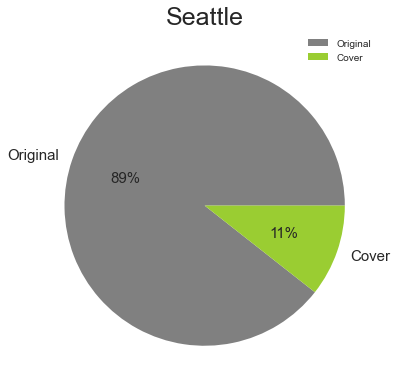

In [52]:
seattle = concat[concat['city']=='Seattle']

seattle['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Seattle',fontsize=25)
plt.tight_layout()

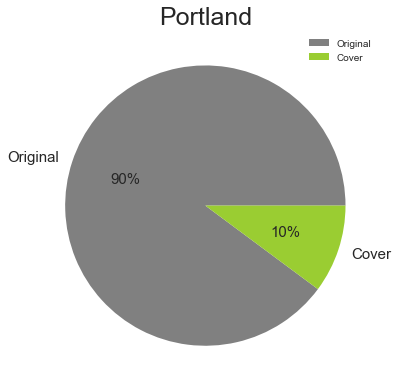

In [53]:
portland = concat[concat['city']=='Portland']

portland['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Portland',fontsize=25)
plt.tight_layout()


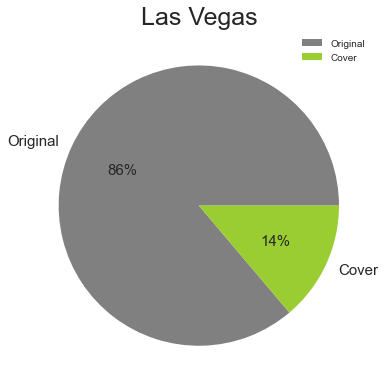

In [54]:
las_vegas = concat[concat['city']=='Las Vegas']

las_vegas['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Las Vegas',fontsize=25)
plt.tight_layout()

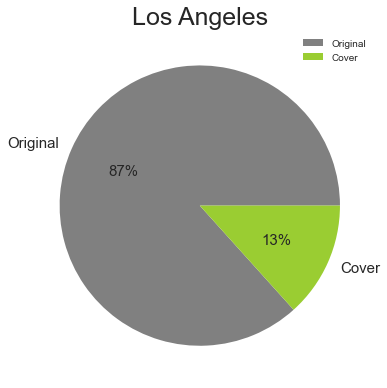

In [55]:
los_angeles = concat[concat['city']=='Los Angeles']

los_angeles['original_vs_cover'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Los Angeles',fontsize=25)
plt.tight_layout()

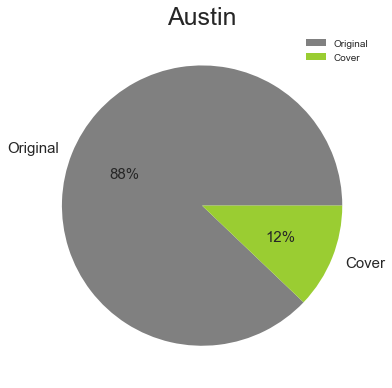

In [56]:
austin = concat[concat['city']=='Austin']

austin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Austin',fontsize=25)
plt.tight_layout()

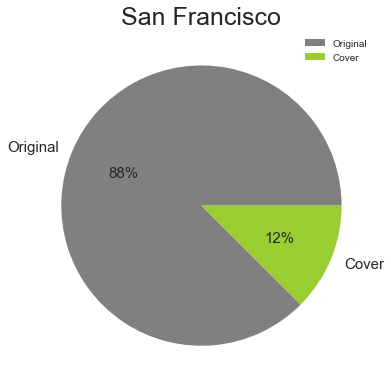

In [57]:
san_francisco = concat[concat['city']=='San Francisco']

san_francisco['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('San Francisco',fontsize=25)
plt.tight_layout()

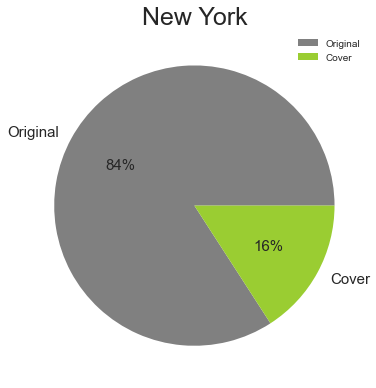

In [58]:
new_york = concat[concat['city']=='New York']

new_york['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('New York',fontsize=25)
plt.tight_layout()



## PIE CHARTS FOR NON US CITIES

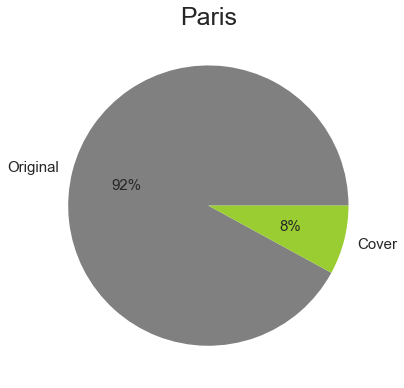

In [59]:
paris = concat[concat['city']=='Paris']
paris['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Paris',fontsize=25)
plt.tight_layout()

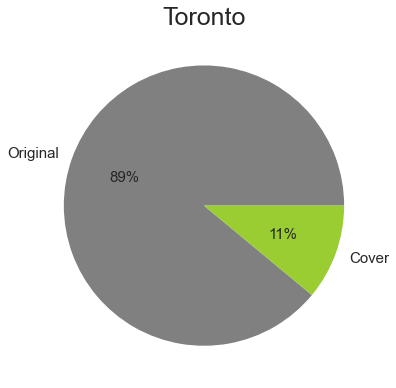

In [60]:
toronto = concat[concat['city']=='Toronto']
toronto['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Toronto',fontsize=25)
plt.tight_layout()

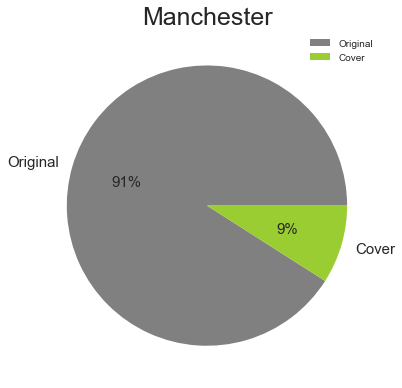

In [61]:
manchester = concat[concat['city']=='Manchester']
manchester['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Manchester',fontsize=25)
plt.tight_layout()

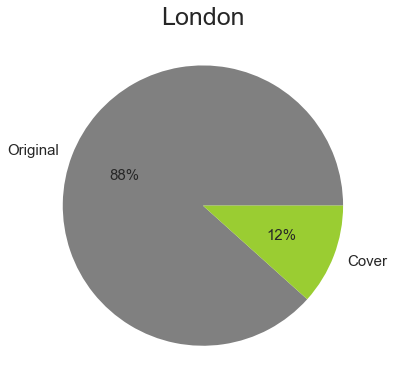

In [62]:
london = concat[concat['city']=='London']
london['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('London',fontsize=25)
plt.tight_layout()

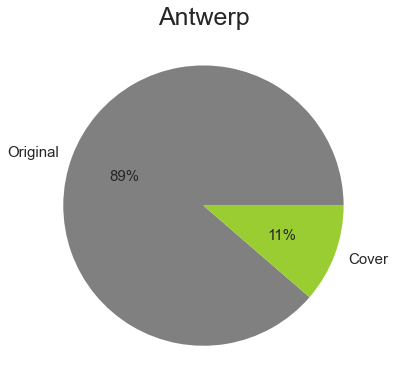

In [63]:
antwerp = concat[concat['city']=='Antwerp']
antwerp['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Antwerp',fontsize=25)
plt.tight_layout()

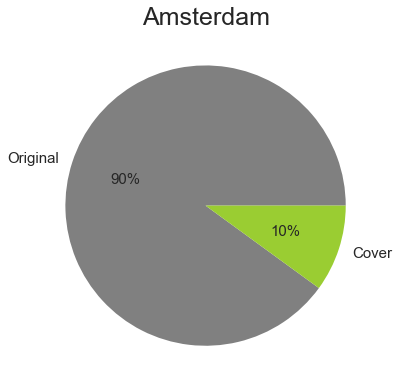

In [64]:
amsterdam = concat[concat['city']=='Amsterdam']
amsterdam['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Amsterdam',fontsize=25)
plt.tight_layout()

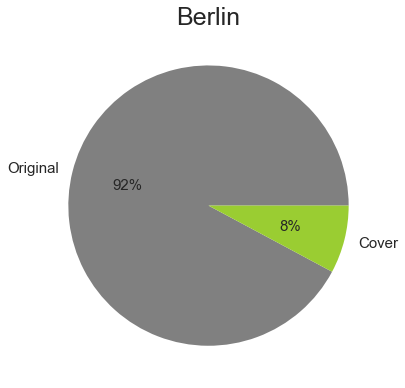

In [65]:
berlin = concat[concat['city']=='Berlin']
berlin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Berlin',fontsize=25)
plt.tight_layout()

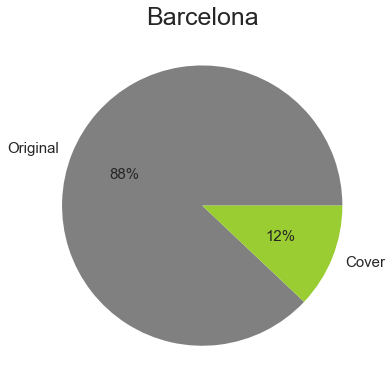

In [66]:
barcelona = concat[concat['city']=='Barcelona']
barcelona['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Barcelona',fontsize=25)
plt.tight_layout()

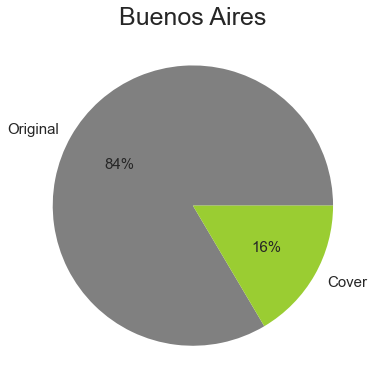

In [67]:
buenos_aires = concat[concat['city']=='Buenos Aires']
buenos_aires['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Buenos Aires',fontsize=25)
plt.tight_layout()

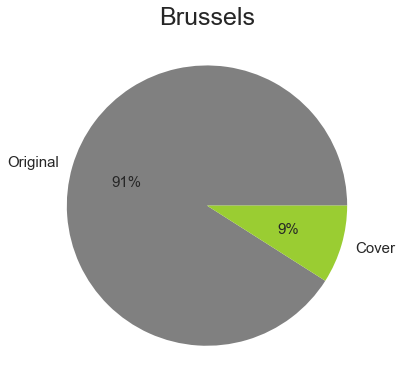

In [68]:
brussels = concat[concat['city']=='Brussels']
brussels['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Brussels',fontsize=25)
plt.tight_layout()

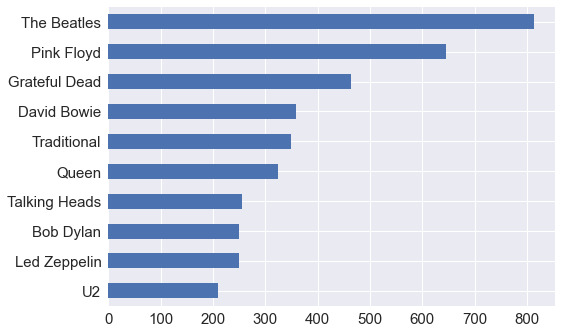

In [69]:
chart =covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Artists',fontsize=25)
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.savefig("Eligibility_Categories.png")
# plt.show()

<AxesSubplot:>

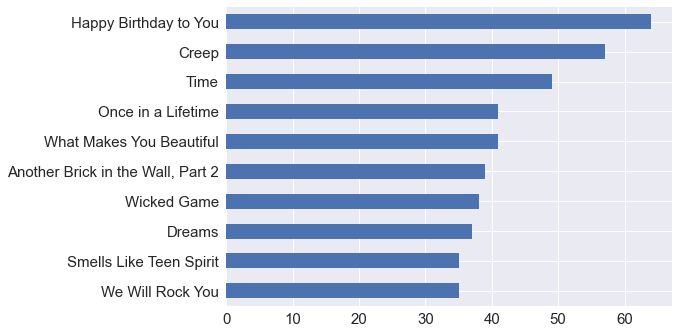

In [70]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Songs',fontsize=25)

In [71]:
concat.groupby(['original_vs_cover', 'artist'])['song'].count()


original_vs_cover  artist                                    
Cover              !!!                                             1
                   !Bang Elektronika                               1
                   $NOT                                            3
                   (həd) p.e.                                      2
                   .MAR                                            1
                                                                ... 
Original           ĠENN                                            7
                   ‐M‐                                           118
                   ’68                                             6
                   “Weird Al” Yankovic                           232
                   …And You Will Know Us by the Trail of Dead     76
Name: song, Length: 14162, dtype: int64

In [72]:
# want to look at what venues have the highest proportion of covers to originals (group by cvo and venue)
# want to look at which artists play the most cover songs (group by cvo and artist)

<AxesSubplot:>

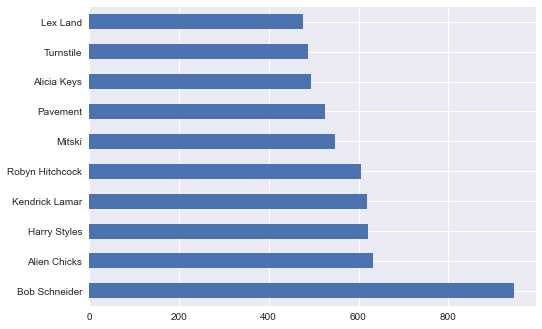

In [73]:
concat['artist'].value_counts().nlargest(10).plot(kind='barh')

In [74]:
harry_styles=concat[concat['artist']=='Harry Styles']
distribution = harry_styles.groupby('original_vs_cover').count()
distribution

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover
original_vs_cover,,,,,,,,,,,,,,,,
Cover,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
Original,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567


In [75]:
concat.groupby('original_vs_cover')['state'].value_counts(normalize=True).mul(100)

original_vs_cover  state                          
Cover              England                            19.359242
                   California                         14.180183
                   New York                           10.430384
                   Illinois                            7.274771
                   Texas                               5.848188
                   Ontario                             5.679567
                   Autonomous City of Buenos Aires     5.146941
                   Tennessee                           5.069322
                   Île-de-France                       4.314544
                   Washington                          4.068305
                   Colorado                            3.171672
                   Oregon                              3.166319
                   North Holland                       3.029816
                   Berlin                              2.970933
                   Catalonia                         

In [76]:
nashville.groupby('original_vs_cover')['venue'].value_counts(normalize=True).mul(100)

original_vs_cover  venue                   
Cover              Ryman Auditorium            30.834213
                   Bridgestone Arena           10.506864
                   City Winery                  6.230201
                   The Basement East            6.071806
                   Private Venue                4.435058
                                                 ...    
Original           CMT Crossroads               0.008702
                   Cabana Taps                  0.008702
                   Margaritaville Nashville     0.008702
                   Random Sample                0.008702
                   WSMV Studios                 0.008702
Name: venue, Length: 157, dtype: float64

In [77]:
concat.groupby('state')['original_vs_cover'].value_counts(normalize=True).mul(100).round()

state                            original_vs_cover
Antwerp                          Original             89.0
                                 Cover                11.0
Autonomous City of Buenos Aires  Original             84.0
                                 Cover                16.0
Berlin                           Original             92.0
                                 Cover                 8.0
Brussels-Capital Region          Original             91.0
                                 Cover                 9.0
California                       Original             87.0
                                 Cover                13.0
Catalonia                        Original             88.0
                                 Cover                12.0
Colorado                         Original             90.0
                                 Cover                10.0
England                          Original             89.0
                                 Cover                11.0
Illin

<AxesSubplot:ylabel='city,original_vs_cover'>

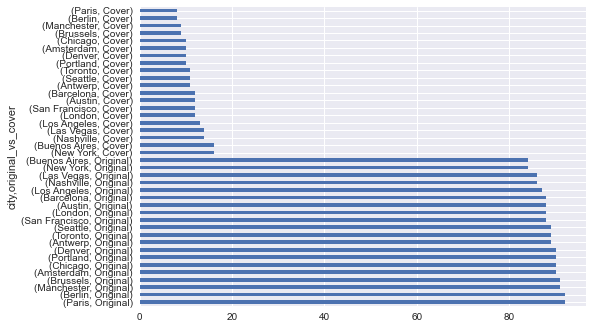

In [78]:
concat.groupby('city')['original_vs_cover'].value_counts(normalize=True).mul(100).round().sort_values(ascending=False).plot(kind='barh')



<AxesSubplot:ylabel='City'>

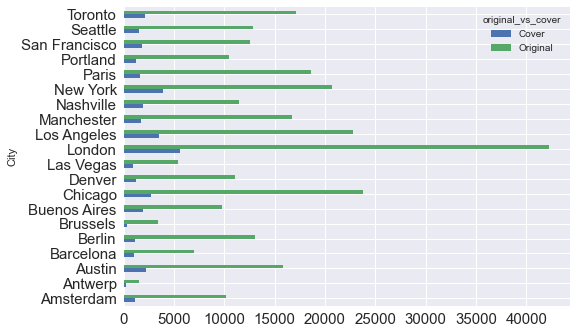

In [79]:
concat.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='City', legend=True, ylabel='', fontsize=15)


In [80]:
concat_1 = concat[['ids', 'country','original_vs_cover']]

In [81]:
concat_2 =concat_1.groupby(['country', 'original_vs_cover']).count()

In [82]:
concat_3 =concat_2.reset_index()
concat_3

,country,original_vs_cover,ids
0,Argentina,Cover,1923
1,Argentina,Original,9737
2,Belgium,Cover,524
3,Belgium,Original,4864
4,Canada,Cover,2122
5,Canada,Original,17137
6,France,Cover,1612
7,France,Original,18643
8,Germany,Cover,1110
9,Germany,Original,13081


Text(0.5, 1.0, 'Covers VS Originals')

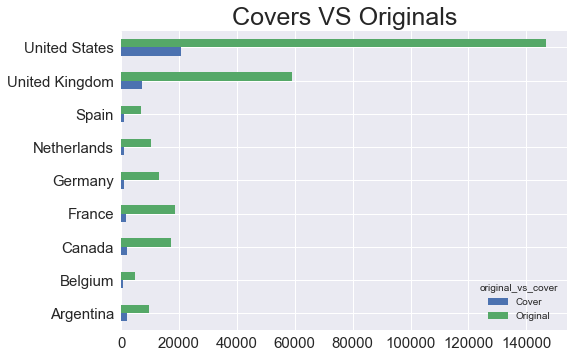

In [83]:
concat.groupby(['country', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)

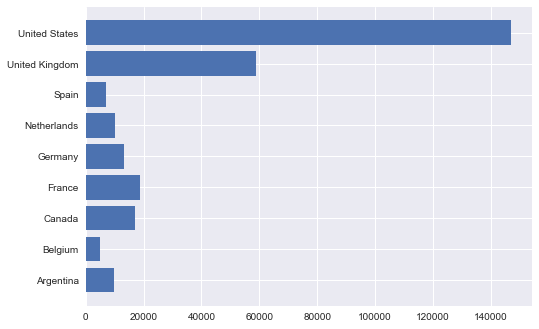

In [84]:
plt.barh(concat_3['country'], concat_3['ids'])
plt.show()



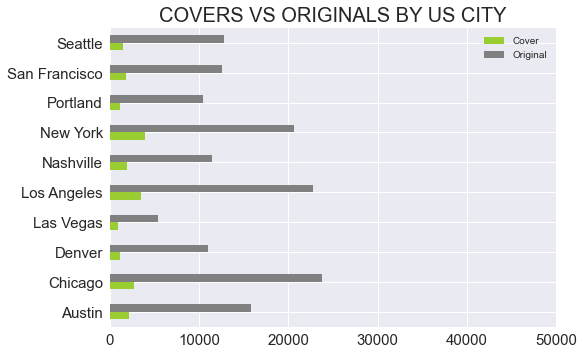

In [159]:
us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', color=['yellowgreen', 'grey'],legend=False, ylabel='', fontsize=15)

plt.title('COVERS VS ORIGINALS BY US CITY',fontsize=20)
plt.legend(title = '')
plt.xticks(tick_val)
tick_val = [0,10000,20000,30000,40000,50000]


In [153]:
chart_1 = us.groupby(['city', 'original_vs_cover'])
chart_1.head()




,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153279,1bbca9f4,g2be3b80a,13-12-2022,2022-12-14T18:07:22.853+0000,Los Straitjackets,Great American Music Hall,4bd4c71e,San Francisco,California,United States,CA,US,37.775000,-122.419000,Linus and Lucy,Vince Guaraldi,Cover
153282,1bbca9f4,g2be3b80a,13-12-2022,2022-12-14T18:07:22.853+0000,Los Straitjackets,Great American Music Hall,4bd4c71e,San Francisco,California,United States,CA,US,37.775000,-122.419000,Red Hot,Robert Gordon,Cover
153283,1bbca9f4,g2be3b80a,13-12-2022,2022-12-14T18:07:22.853+0000,Los Straitjackets,Great American Music Hall,4bd4c71e,San Francisco,California,United States,CA,US,37.775000,-122.419000,Cruel to Be Kind,Nick Lowe,Cover
153286,1bbca9f4,g2be3b80a,13-12-2022,2022-12-14T18:07:22.853+0000,Los Straitjackets,Great American Music Hall,4bd4c71e,San Francisco,California,United States,CA,US,37.775000,-122.419000,Sleigh Ride,Leroy Anderson & His Pops Orchestra,Cover


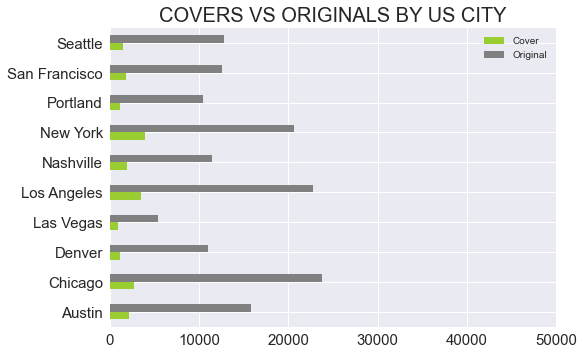

In [154]:
chart_1.size().unstack().plot(kind='barh', xlabel='', color=['yellowgreen', 'grey'],legend=False, ylabel='', fontsize=15)

plt.title('COVERS VS ORIGINALS BY US CITY',fontsize=20)
plt.legend(title = '')
plt.xticks(tick_val)
tick_val = [0,10000,20000,30000,40000,50000]
# plt.figure(figsize=(10,50)) 




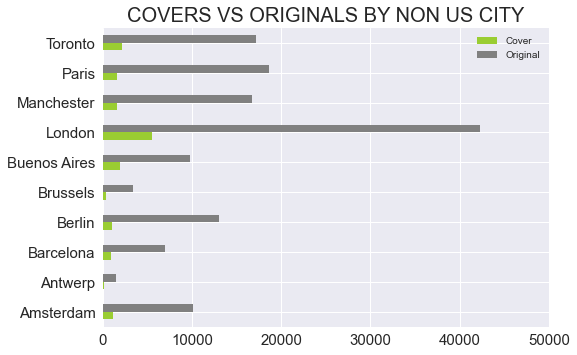

In [103]:
non_us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='',color=['yellowgreen', 'grey'], legend=True,ylabel='', fontsize=15)

plt.title('COVERS VS ORIGINALS BY NON US CITY',fontsize=20)
plt.legend(title = '')
plt.xticks(tick_val)
tick_val = [0,10000,20000,30000,40000,50000]

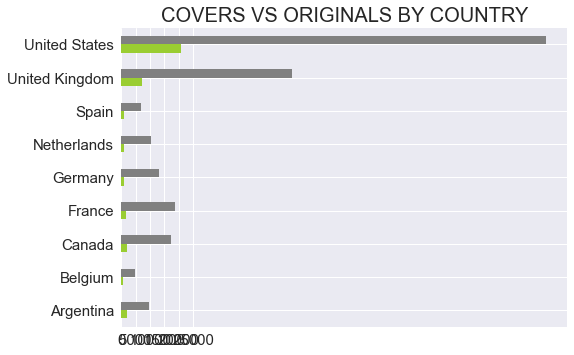

In [119]:
concat.groupby(['country', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', color=['yellowgreen', 'grey'],legend=False, ylabel='', fontsize=15)

plt.title('COVERS VS ORIGINALS BY COUNTRY',fontsize=20)
plt.xticks(tick_val)
tick_val = [0,5000,10000,15000,20000,25000]


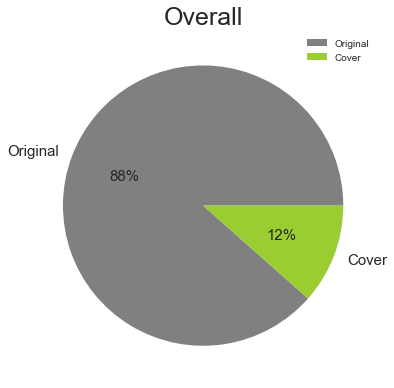

In [88]:
concat['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Overall',fontsize=25)
plt.tight_layout()
                        

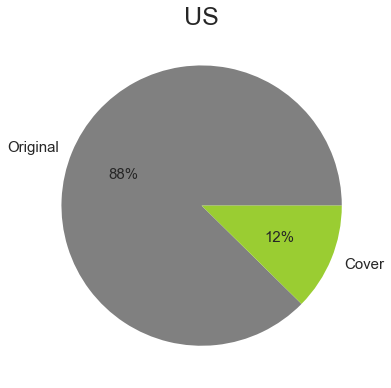

In [89]:
us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=False, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('US',fontsize=25)
plt.tight_layout()
                        

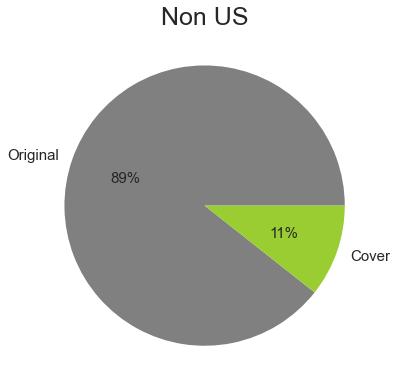

In [90]:
non_us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=False, ylabel='',colors=['grey','yellowgreen'], fontsize=15)

plt.title('Non US',fontsize=25)
plt.tight_layout()
                        

In [91]:
concat['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)


,original_vs_cover
Original,88.0
Cover,12.0


In [92]:
us_df = us['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

In [93]:
non_us_df= non_us['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

In [94]:
nashville['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

,original_vs_cover
Original,86.0
Cover,14.0


In [95]:
both = pd.concat([us_df, non_us_df])
both

,original_vs_cover
Original,88.0
Cover,12.0
Original,89.0
Cover,11.0


In [96]:
concat_3

,country,original_vs_cover,ids
0,Argentina,Cover,1923
1,Argentina,Original,9737
2,Belgium,Cover,524
3,Belgium,Original,4864
4,Canada,Cover,2122
5,Canada,Original,17137
6,France,Cover,1612
7,France,Original,18643
8,Germany,Cover,1110
9,Germany,Original,13081


In [97]:
# concat_3.groupby(['country', 'original_vs_cover']).value_counts(normalize=True).to_frame()


In [98]:
# artists who played the most songs. Also want to look at who played the most shows? group by ids?
concat['artist'].value_counts()

Bob Schneider             947
Alien Chicks              632
Harry Styles              620
Kendrick Lamar            618
Robyn Hitchcock           606
                         ... 
Omar                        1
Silvina Moreno              1
Yellow Socks Orchestra      1
Molly Pepper                1
Yves Paquet                 1
Name: artist, Length: 10058, dtype: int64

In [99]:
concat['venue'].value_counts()

O2 Academy Brixton                               2797
Ryman Auditorium                                 2791
Private Venue                                    2635
Paradiso Grote Zaal                              2280
The O2 Arena                                     2233
                                                 ... 
Salmon Bay Eagles (Fraternal Order of Eagles)       1
Teatro de la Psychomachia                           1
Phonox                                              1
Fraternal Order of Eagles                           1
Théâtre du Châtelet                                 1
Name: venue, Length: 2334, dtype: int64

In [100]:
concat.groupby('artist')['ids'].count().nlargest(10)

artist
Bob Schneider      947
Alien Chicks       632
Harry Styles       620
Kendrick Lamar     618
Robyn Hitchcock    606
Mitski             547
Pavement           526
Alicia Keys        493
Turnstile          488
Lex Land           477
Name: ids, dtype: int64

In [101]:
concat.groupby(['artist', 'ids']).count().nlargest(10)

TypeError: nlargest() missing 1 required positional argument: 'columns'

In [ ]:
concat_id = concat.reset_index()
concat_id.head()

In [ ]:
# shows artists with the longest sets


concat_id.groupby(['artist', 'ids'])['index'].count().nlargest(10)

In [ ]:
# shows venues with the longest sets

concat_id.groupby(['venue', 'ids'])['index'].count().nlargest(10)

In [ ]:
concat_id.groupby(['venue', 'ids'])['original_vs_cover'].count().nlargest(10)

In [ ]:
# look at song name popularity (that is not a cover)

originals = concat[concat['original_vs_cover']=='Original']

originals['song'].value_counts().nlargest(25)

In [ ]:
originals.groupby('artist')['song'].count().nlargest(25)

In [ ]:
# artist with the most shows overall (arist by ids)

concat.groupby('artist')['ids'].count().nlargest(10)

In [ ]:
concat['ids'].value_counts()

In [ ]:
# second longest set:

second_longest_set = concat[concat['ids']=='53898f31']
second_longest_set.head()

In [ ]:
second_longest_set['song'].value_counts()

# no repeated songs

In [ ]:
# Guided by Voices played 46 songs and 2 of them were covers

second_longest_set['original_vs_cover'].value_counts()

In [ ]:
# want to look at most popular song names but grouped by show (ids) or artist

In [ ]:
# venues with the most songs played 
concat['venue'].value_counts().nlargest(25).plot(kind='barh')

In [ ]:
# shows the amount of songs per show

shows = concat.groupby('ids').count()
shows.head()

In [ ]:
# cover bands?


In [ ]:
# look at which venues have the most cover songs played their venues
# group by ids (show). Then calculate proportion of original to cover. Create seperate column to classify set as more original or more covers. create this measurre based on average amount of covers per set. 
# Find average cover songs/set. 

# for each set, need count of originals and count of covers. group by ids and adding up original and covers. 
# datacamp lesson: two columns (set id, original vs cover column) make a simple dictionary and turn it into a dataframe 

# if a band has specific percentage of covers, then call them a cover band

concat.groupby('ids').count()

# concat.groupby('ids')['covers'].sum()

In [ ]:
test = concat[['ids','original_vs_cover']]
test.head()

In [ ]:
# concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')

test['original']= np.where(test['original_vs_cover']=='Original', 1, 0)
test.head()

In [ ]:
test['cover']=np.where(test['original_vs_cover']=='Cover', 1, 0)
test.head()

In [ ]:

grouped_setlists =test.groupby('ids')[('cover', 'original')].sum()

In [ ]:
grouped_setlists['total songs']=grouped_setlists['cover']+grouped_setlists['original']
grouped_setlists.head()

In [ ]:
grouped_setlists['perc_cover']=grouped_setlists['cover']/grouped_setlists['total songs']
grouped_setlists.head()

In [ ]:
grouped_setlists.describe()

In [ ]:
coverbands = grouped_setlists[grouped_setlists['perc_cover']==1]
coverbands

In [ ]:
original_bands = grouped_setlists[grouped_setlists['perc_cover']<1]
original_bands.head()

In [ ]:
coverbands.describe()

In [ ]:
coverbands_all_setlist_lengths = grouped_setlists[grouped_setlists['perc_cover']==1]

In [ ]:
coverbands_less_than_7_songs = coverbands_all_setlist_lengths[coverbands_all_setlist_lengths['cover']<=7]

In [ ]:
all_other = pd.concat[coverbands_all_setlist_lengths, original_bands]

In [ ]:
# coverbands means 100% setlist is cover songs and setlist is at least 8 songs

coverbands = coverbands[coverbands['cover']>7]
coverbands

In [ ]:
coverbands_setlists=coverbands.reset_index()

In [ ]:
coverband_setlist_id_list = coverbands_setlists['ids'].tolist()
len(coverband_setlist_id_list)
# nashville_venue_id_list = nashville_venues_df['venue_id'].tolist()


In [ ]:
# df[df[df.columns[1]].isin(list)]

list = coverband_setlist_id_list

coverband_df = concat[concat[concat.columns[0]].isin(list)]

# new = data["Gender"].isin(["Male"])

In [ ]:
coverband_df.head(50)

In [ ]:
coverband_df['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='grey',fontsize=15)

plt.title('TOP 10 COVER BANDS',fontsize=20)


In [ ]:
coverband_df.to_excel('music_matters_coverbands.xlsx', sheet_name='coverbands', index=False)

In [ ]:
non_us_coverbands= coverband_df[coverband_df['country']!='United States']
non_us_coverbands.head()

In [ ]:
us_coverbands= coverband_df[coverband_df['country']=='United States']
us_coverbands.head()

In [ ]:
non_us_coverbands['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', color='grey',fontsize=15)

plt.title('TOP 10 COVER BANDS OUTSIDE US',fontsize=20)
plt.xticks(tick_val)
tick_val = [0,50,100,150,200]

In [ ]:
us_coverbands['artist'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15,color='grey')

plt.title('TOP 10 COVER BANDS IN US',fontsize=20)

plt.xticks(tick_val)
tick_val = [0,50,100,150,200]

In [ ]:
coverband_df['country'].value_counts().plot(kind='barh')

plt.title('Locations of Coverbands by Country',fontsize=25)
plt.tight_layout()

In [ ]:
coverband_df['city'].value_counts().plot(kind='barh')

plt.title('Locations of Coverbands by City',fontsize=25)
plt.tight_layout()

In [ ]:
coverband_df['song'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Songs by All Coverbands',fontsize=25)
plt.tight_layout()

In [ ]:
non_us_coverbands['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')
plt.title('TOP 10 COVERED SONGS BY COVER BANDS OUTSIDE US',fontsize=15)


In [ ]:
us_coverbands['song'].value_counts().nlargest(10).plot(kind='barh', color='yellowgreen')

plt.title('Top 10 Covered Songs by US Coverbands',fontsize=25)


In [ ]:
us_coverbands['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')

plt.xticks(tick_val)
tick_val = [0,50,100,150,200,250,300]
plt.title('TOP 10 COVERED ARTISTS BY COVER BANDS IN US',fontsize=15)

In [ ]:
non_us_coverbands['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')


plt.title('TOP 10 COVERED ARTISTS BY COVER BANDS OUTSIDE US',fontsize=15)
plt.xticks(tick_val)
tick_val = [0,50,100,150,200,250,300]

In [ ]:
coverband_df['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', fontsize=15, color='grey')
plt.title('TOP 10 COVERED ARTISTS OVERALL',fontsize=15)


In [ ]:
non_us_coverbands['cover'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Artists by Non-Us Coverbands',fontsize=25)
plt.tight_layout()

In [ ]:
us_coverbands['cover'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Artists by US Coverbands',fontsize=25)
plt.tight_layout()

In [ ]:
us_coverbands['cover'].value_counts().nlargest(10).plot(kind='barh')

plt.title('Top 10 Covered Artists by US Coverbands',fontsize=25)
plt.tight_layout()

In [ ]:
len(coverband_df)

In [ ]:
# need to eliminate sets that are only 1 song so we don't include bands like punch brothers who played one song and it happended to be traditional

punch_brothers = concat[concat['ids']=='6bbf6a6e']
punch_brothers

In [ ]:
artists_by_show =concat.groupby(['artist','ids']).count()
artists_by_show

In [ ]:

concat_id.groupby('artist')['index'].count().nlargest(10)

In [ ]:
concat.head(10)

In [ ]:
concat['ids'].value_counts()

In [ ]:
longest_set = concat[concat['ids']=='7bb22a58']
longest_set

In [ ]:
longest_set.tail(50)

In [ ]:
longest_set['original_vs_cover'].value_counts()

In [ ]:
non_us.groupby(['artist', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by Non US Cities',fontsize=25)

In [ ]:
concat_index=concat.reset_index()
concat_index.head()

In [ ]:
concat_index.to_excel('music_matters_main_dataframe_no_abba.xlsx', sheet_name='main_dataframe_no_abba', index=False)

In [ ]:
concat.head()

In [ ]:
canada=concat_index[concat_index['country']=='Canada']


In [ ]:
len(canada)

In [ ]:
concat_index.shape

In [ ]:
concat.shape

In [ ]:
concat_index['ids'].value_counts(dropna=False)

In [ ]:
324833/29035


In [ ]:
concat_index.nunique()

In [ ]:
canada.nunique()

# 1705 unique setlist ids

In [ ]:
concat_index['song'].value_counts().nlargest(10)

In [ ]:
covers['song'].value_counts().nlargest(10)

In [ ]:
coverbands